a number of (input_dimension + output_dimension) * 10 data is a good start

a number of sqrt(input_dimsension * output_dimension) or (input_dim + output_dim) / 2 neurons are good starting tries

In [1]:
import model
import torch
import numpy as np

In [2]:
X = np.load("toy_data/inputs_constant.npy")
X = torch.tensor(X)
Y = np.load("toy_data/outputs_constant.npy")
Y = torch.tensor(Y)

In [3]:
perm = torch.randperm(X.size(0))
X_shuffled = X[perm]
Y_shuffled = Y[perm]

In [4]:
N = X_shuffled.size(0)

train_idx = int(0.8 * N)
val_idx = int(0.9 * N)

X_train = X_shuffled[:train_idx]
Y_train = Y_shuffled[:train_idx]

X_val = X_shuffled[train_idx:val_idx]
Y_val = Y_shuffled[train_idx:val_idx]

X_test = X_shuffled[val_idx:]
Y_test = Y_shuffled[val_idx:]

In [5]:
X_train_reshape = X_train.t()
Y_train_reshape = Y_train.view(Y_train.size(0), -1).t()

X_val_reshape = X_val.t()
Y_val_reshape = Y_val.view(Y_val.size(0), -1).t()

X_test_reshape = X_test.t()
Y_test_reshape = Y_test.view(Y_test.size(0), -1).t()

In [6]:
input_layer_size = 2
output_layer_size = 3 * 14

hidden_layers = [22, 15, 9]

layers_dims = [input_layer_size] + hidden_layers + [output_layer_size]

Cost after epoch 0: 1620.573044
Cost after epoch 1000: 0.758188
Cost after epoch 2000: 0.777205
Cost after epoch 3000: 0.770490
Cost after epoch 4000: 0.756875


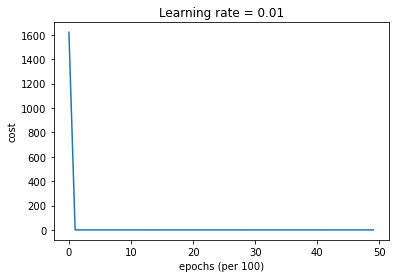

In [7]:
params = model.model(X_train_reshape, Y_train_reshape, layers_dims, 0.01)

In [8]:
Y_predict = model.predict(params, X_val_reshape)

In [11]:
model.compute_cost(Y_predict, Y_val_reshape, params, 0)

tensor(46.9298, dtype=torch.float64)